# Micro Credit Defaulter Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')

We have imported all the necessary libraries.

In [2]:
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Here we read the CSV file in jupyter notebook and printing first 5 rows of the dataset.

In [3]:
df = pd.DataFrame(data=df)
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


Here we are loading the dataset into DataFrame and printing last 5 rows of the dataset.

In [4]:
df.sample(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
53602,53603,1,43582I84457,1400.0,3976.000000,9327.240000,200.13,902.79,9.0,0.0,...,12.0,0.5,7.0,48,12,0.0,0.00,3.666667,UPW,2016-08-13
105503,105504,1,61507I91197,265.0,8.617333,8.617333,42.98,42.98,6.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-06-02
42469,42470,1,45676I88690,1036.0,22.618667,22.618667,175.20,175.20,2.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-06-08
110750,110751,1,87513I90587,155.0,15.921000,15.921000,62.46,62.46,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-06-09
45592,45593,1,52875I89239,1846.0,77.940000,77.940000,280.00,280.00,1.0,0.0,...,6.0,0.0,6.0,36,6,0.0,4.20,4.200000,UPW,2016-06-20
46908,46909,1,04251I90847,85.0,88.382667,88.382667,234.00,234.00,9.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.00,0.000000,UPW,2016-06-26
103128,103129,1,79891I70783,303.0,80.116667,80.116667,307.05,307.05,3.0,0.0,...,6.0,0.0,5.0,30,6,0.0,2.75,2.750000,UPW,2016-06-23
189710,189711,1,34013I90842,295.0,92.088000,92.088000,-232.20,-232.20,12.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-06-09
149969,149970,1,02742I82733,1217.0,3902.000000,3924.670000,315.45,859.95,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.00,42.000000,UPW,2016-07-31
186735,186736,1,04651I91197,63.0,50.778000,50.778000,570.06,570.06,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.00,0.000000,UPW,2016-06-18


Displaying 10 random samples from the dataset to understand it more.

# Data Inspection

In [5]:
df.shape

(209593, 37)

There are 209593 rows and 37 columns in the given dataset.

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

It gives us the data type of each column. The target variable of the given dataset is of integer datatype.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

It gives us the Name of columns with its non-null value counts , it's datatype , index number and memory usage. There are 21 columns with float datatypes, 13 columns with integer datatype and only 3 columns with object datatype.

In [8]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


It gives us the mean , median, standard deviation , minimum and maximum value of all the numerical columns (columns with float and integer datatype) present in the dataset.

In [9]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

It gives us the list of all columns title.

1. 'Unnamed: 0' : It contains the serial number, hence we can drop this column.
2. 'label' : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
3. 'msisdn' : mobile number of user
4. 'aon' : age on cellular network in days
5. 'daily_decr30' : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
6. 'daily_decr90' : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
7. 'rental30' : Average main account balance over last 30 days
8. 'rental90' : Average main account balance over last 90 days    
9. 'last_rech_date_ma' : Number of days till last recharge of main account
10. 'last_rech_date_da' : Number of days till last recharge of data account
11. 'last_rech_amt_ma' : Amount of last recharge of main account (in Indonesian Rupiah)
12. 'cnt_ma_rech30' : Number of times main account got recharged in last 30 days
13. 'fr_ma_rech30' : Frequency of main account recharged in last 30 days
14. 'sumamnt_ma_rech30' : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
15. 'medianamnt_ma_rech30' : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
16. 'medianmarechprebal30' : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
17. 'cnt_ma_rech90' : Number of times main account got recharged in last 90 days
18. 'fr_ma_rech90' : Frequency of main account recharged in last 90 days
19. 'sumamnt_ma_rech90' : Total amount of recharge in main account over last 90 days (in Indonesian Rupiah)
20. 'medianamnt_ma_rech90' : Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah)
21. 'medianmarechprebal90' : Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)
22. 'cnt_da_rech30' : Number of times data account got recharged in last 30 days
23. 'fr_da_rech30' : Frequency of data account recharged in last 30 days
24. 'cnt_da_rech90' : Number of times data account got recharged in last 90 days
25. 'fr_da_rech90' : Frequency of data account recharged in last 90 days
26. 'cnt_loans30' : Number of loans taken by user in last 30 days
27. 'amnt_loans30' : Total amount of loans taken by user in last 30 days
28. 'maxamnt_loans30' : maximum amount of loan taken by the user in last 30 days
29. 'medianamnt_loans30' : Median of amounts of loan taken by the user in last 30 days
30. 'cnt_loans90' : Number of loans taken by user in last 90 days
31. 'amnt_loans90' : Total amount of loans taken by user in last 90 days
32. 'maxamnt_loans90' : maximum amount of loan taken by the user in last 90 days
33. 'medianamnt_loans90' : Median of amounts of loan taken by the user in last 90 days
34. 'payback30' : Average payback time in days over last 30 days
35. 'payback90' : Average payback time in days over last 90 days
36. 'pcircle' : telecom circle
37. 'pdate' : date

# Data Cleaning

In [10]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values present in he given dataset.

<AxesSubplot:>

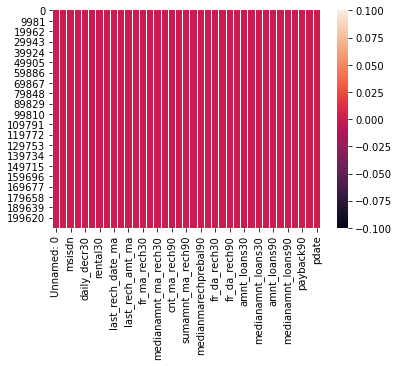

In [11]:
sns.heatmap(df.isnull())

Visual representation of having absolutely no null values in the numerical columns .

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

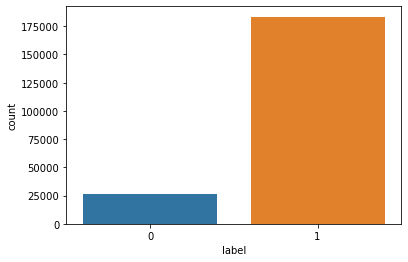

In [12]:
sns.countplot(df['label'])

There is a lot of class imbalance which we will have to treat to train the model with more accuracy.

<AxesSubplot:xlabel='msisdn', ylabel='Count'>

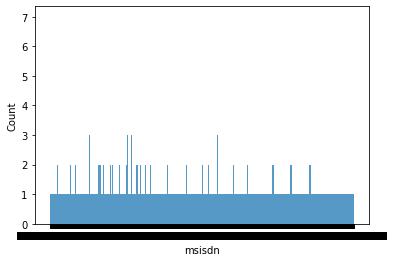

In [13]:
sns.histplot(df['msisdn'])

Every user has a unique mobile number and this feature does not seem to contribute in the 'label' prediction . Hence we will drop this column as well. 

<AxesSubplot:xlabel='aon', ylabel='Density'>

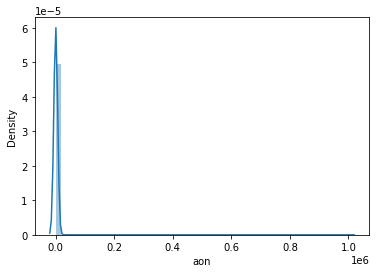

In [14]:
sns.distplot(df['aon'])

This column has normal distribution of data. 

<AxesSubplot:xlabel='daily_decr30', ylabel='Count'>

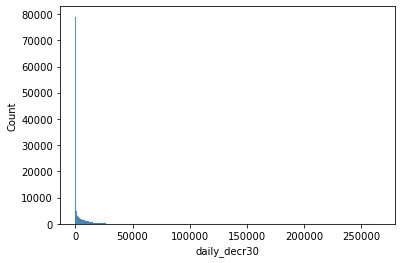

In [15]:
sns.histplot(df['daily_decr30'])

All the data of this column is distributed normally in range 0 to 25000.

<AxesSubplot:xlabel='daily_decr90', ylabel='Count'>

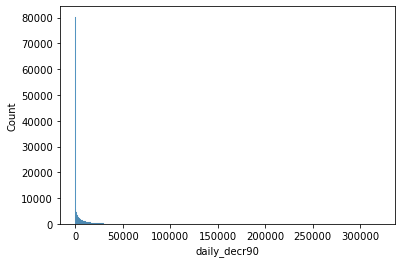

In [16]:
sns.histplot(df['daily_decr90'])

All the data of this column is distributed normally in range 0 to 25000. The column 'daily_decr30' and 'daily_decr90' have almost same data so we might drop them after checking the correlataion.

<AxesSubplot:xlabel='rental30', ylabel='Count'>

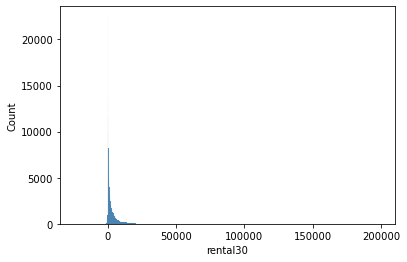

In [17]:
sns.histplot(df['rental30'])

All the data of this column is distributed normally in range 0 to 20000. 

<AxesSubplot:xlabel='rental90', ylabel='Count'>

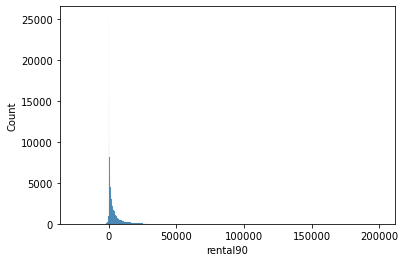

In [18]:
sns.histplot(df['rental90'])

All the data of this column is distributed normally in range 0 to 20000. The column 'rental30' and 'rental90' have almost same data so we might drop them after checking the correlataion.

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

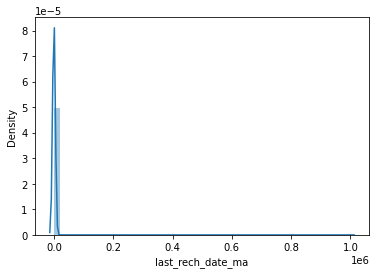

In [19]:
sns.distplot(df['last_rech_date_ma'])

 Number of days till last recharge of main account has normal distribution of data.

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

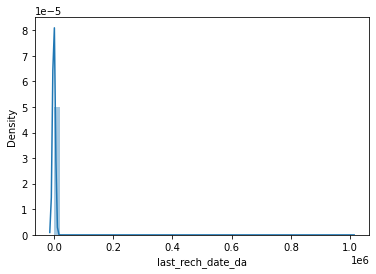

In [20]:
sns.distplot(df['last_rech_date_da'])

'last_rech_date_da' has normal distribution of data.

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

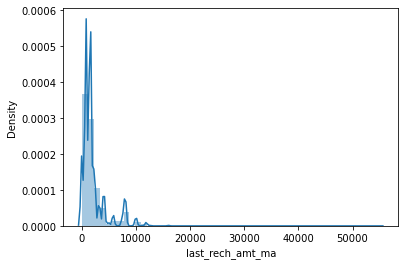

In [21]:
sns.distplot(df['last_rech_amt_ma'])

It does not have normal distribution of data. 

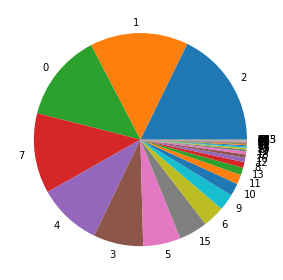

In [22]:
plt.pie(df['cnt_ma_rech30'].value_counts(), labels=df['cnt_ma_rech30'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum 2 , 1 , 7 and 0 Number of times main account got recharged in last 30 days

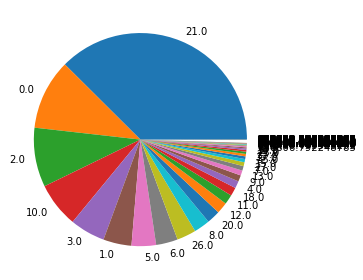

In [23]:
plt.pie(df['fr_ma_rech30'].value_counts(), labels=df['fr_ma_rech30'].unique(),shadow=False)
plt.tight_layout()
plt.show()

 Maximum Frequency of main account recharged in last 30 days is 21.0

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

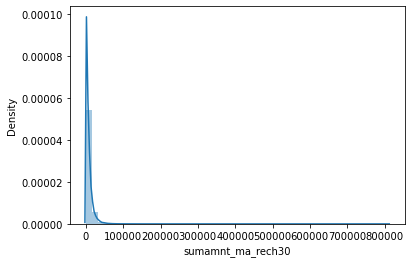

In [24]:
sns.distplot(df['sumamnt_ma_rech30'])

'sumamnt_ma_rech30' has normalized data.

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

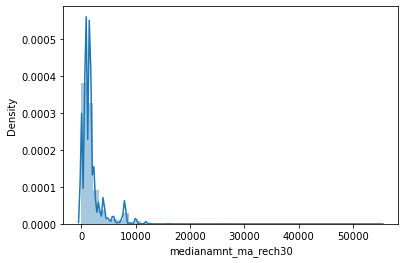

In [25]:
sns.distplot(df['medianamnt_ma_rech30'])

'medianamnt_ma_rech30' does not have normalized data.

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

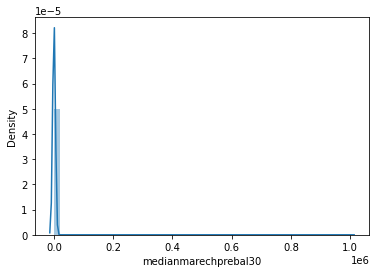

In [26]:
sns.distplot(df['medianmarechprebal30'])

'medianmarechprebal30' has normal distribution of data.

<AxesSubplot:xlabel='cnt_ma_rech90'>

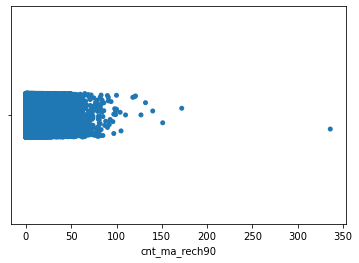

In [27]:
sns.stripplot(df['cnt_ma_rech90'])

'cnt_ma_rech90' has the data scattered in range 0 to 100

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

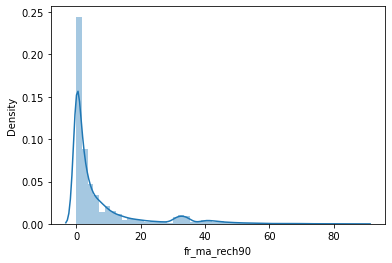

In [28]:
sns.distplot(df['fr_ma_rech90'])

'fr_ma_rech90' has almost normal distribution of data.

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

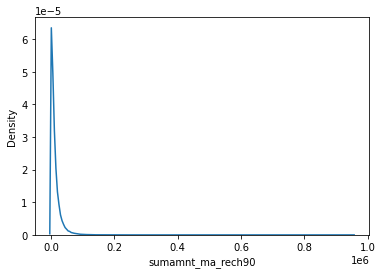

In [29]:
sns.kdeplot(df['sumamnt_ma_rech90'])

'sumamnt_ma_rech90'  has almost normal distribution of data.

<AxesSubplot:xlabel='medianamnt_ma_rech90'>

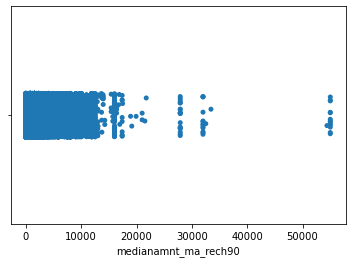

In [30]:
sns.stripplot(df['medianamnt_ma_rech90'])

'medianamnt_ma_rech90' has maximum data scattered in range 0 t0 15000

<AxesSubplot:xlabel='medianmarechprebal90'>

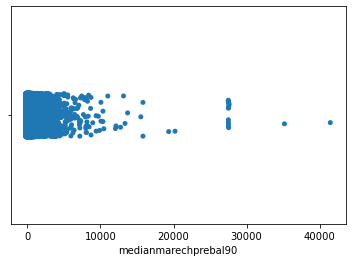

In [31]:
sns.stripplot(df['medianmarechprebal90'])

'medianmarechprebal90' has maximum data scattered in range of 0 to 7500

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

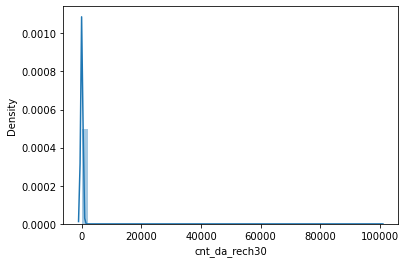

In [32]:
sns.distplot(df['cnt_da_rech30'])

'cnt_da_rech30' has very normal distribution of the data.

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

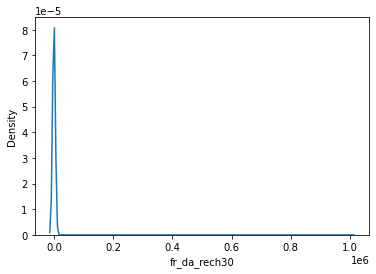

In [33]:
sns.kdeplot(df['fr_da_rech30'])

'fr_da_rech30' has very normal distribution of the data.

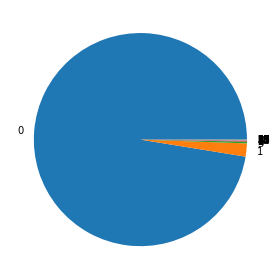

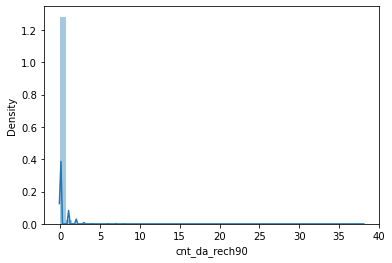

In [34]:
plt.pie(df['cnt_da_rech90'].value_counts(), labels=df['cnt_da_rech90'].unique(),shadow=False)
plt.tight_layout()
plt.show()
sns.distplot(df['cnt_da_rech90'])
plt.show()

'cnt_da_rech90' has maximum data valued at 0.

<AxesSubplot:xlabel='fr_da_rech90'>

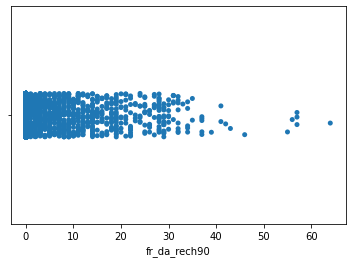

In [35]:
sns.stripplot(df['fr_da_rech90'])

'fr_da_rech90' has maximum data scattered in range 0 to 30

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

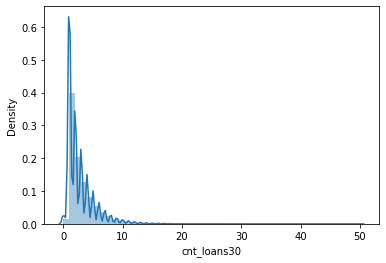

In [36]:
sns.distplot(df['cnt_loans30'])

'cnt_loans30' does not have normalized data distribution.

<AxesSubplot:xlabel='amnt_loans30'>

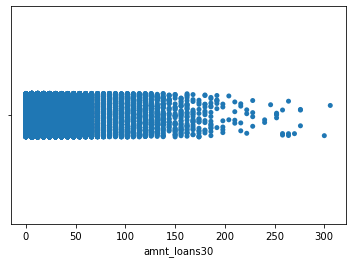

In [37]:
sns.stripplot(df['amnt_loans30'])

'amnt_loans30' has maximum data scattered over a range of 0 to 200

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

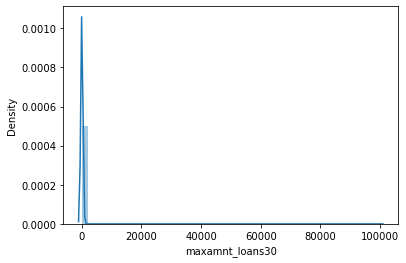

In [38]:
sns.distplot(df['maxamnt_loans30'])

'maxamnt_loans30' has normalized data distribution.

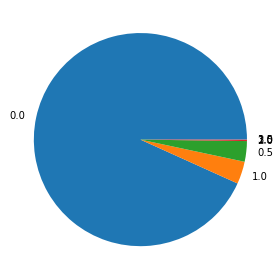

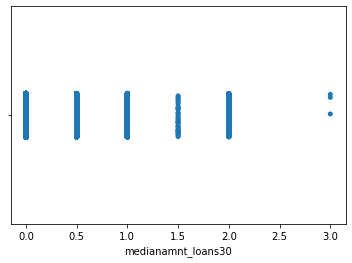

In [39]:
plt.pie(df['medianamnt_loans30'].value_counts(), labels=df['medianamnt_loans30'].unique(),shadow=False)
plt.tight_layout()
plt.show()
sns.stripplot(df['medianamnt_loans30'])
plt.show()

Median of amounts of loan taken by the user in last 30 days is 0, 5, 10, 15, 20 and 30. Though the frequency at 15 and 30 is low.

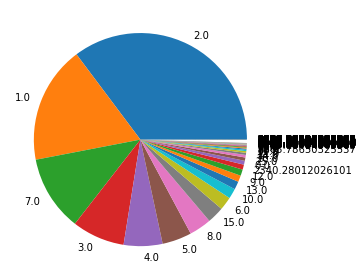

In [40]:
plt.pie(df['cnt_loans90'].value_counts(), labels=df['cnt_loans90'].unique(),shadow=False)
plt.tight_layout()
plt.show()

'cnt_loans90' has maximum data distribution for value 2.0

<AxesSubplot:xlabel='amnt_loans90'>

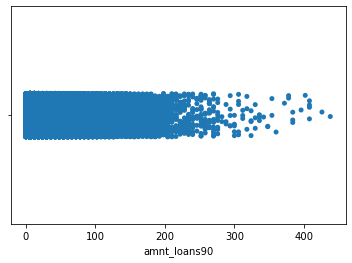

In [41]:
sns.stripplot(df['amnt_loans90'])

'amnt_loans90' is highly densed in eange 0 to 200

<AxesSubplot:xlabel='maxamnt_loans90'>

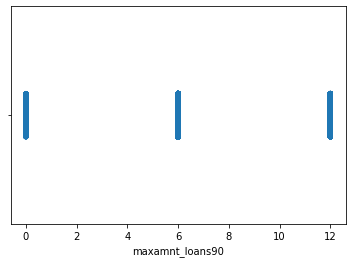

In [42]:
sns.stripplot(df['maxamnt_loans90'])

There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively. 
Otherwise it's 0.

<AxesSubplot:xlabel='medianamnt_loans90'>

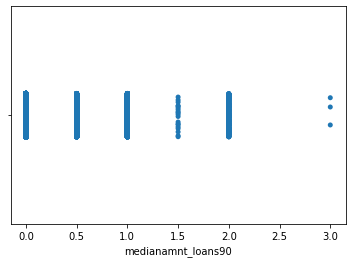

In [43]:
sns.stripplot(df['medianamnt_loans90'])

Median of amounts of loan taken by the user in last 90 days is 0, 5, 10, 15, 20 and 30. Though the frequency at 15 and 30 is low.

<AxesSubplot:xlabel='payback30'>

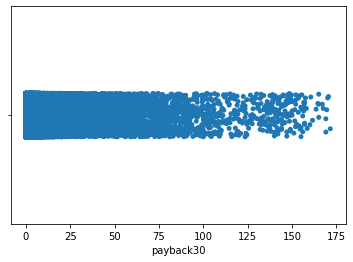

In [44]:
sns.stripplot(df['payback30'])

'payback30' is very densed in range 0 to 100

<AxesSubplot:xlabel='payback90', ylabel='Density'>

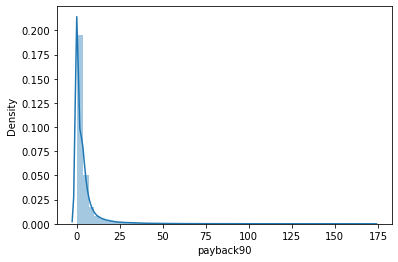

In [45]:
sns.distplot(df['payback90'])

It is almost normally distributed.

<AxesSubplot:xlabel='pcircle', ylabel='Count'>

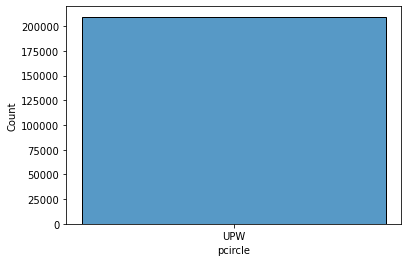

In [46]:
sns.histplot(df['pcircle'])

Looks like pcircle has only one value , so we can drop it.

<AxesSubplot:xlabel='pdate', ylabel='Count'>

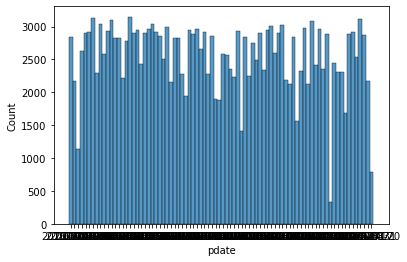

In [47]:
sns.histplot(df['pdate'])

The date is very widely distributed.

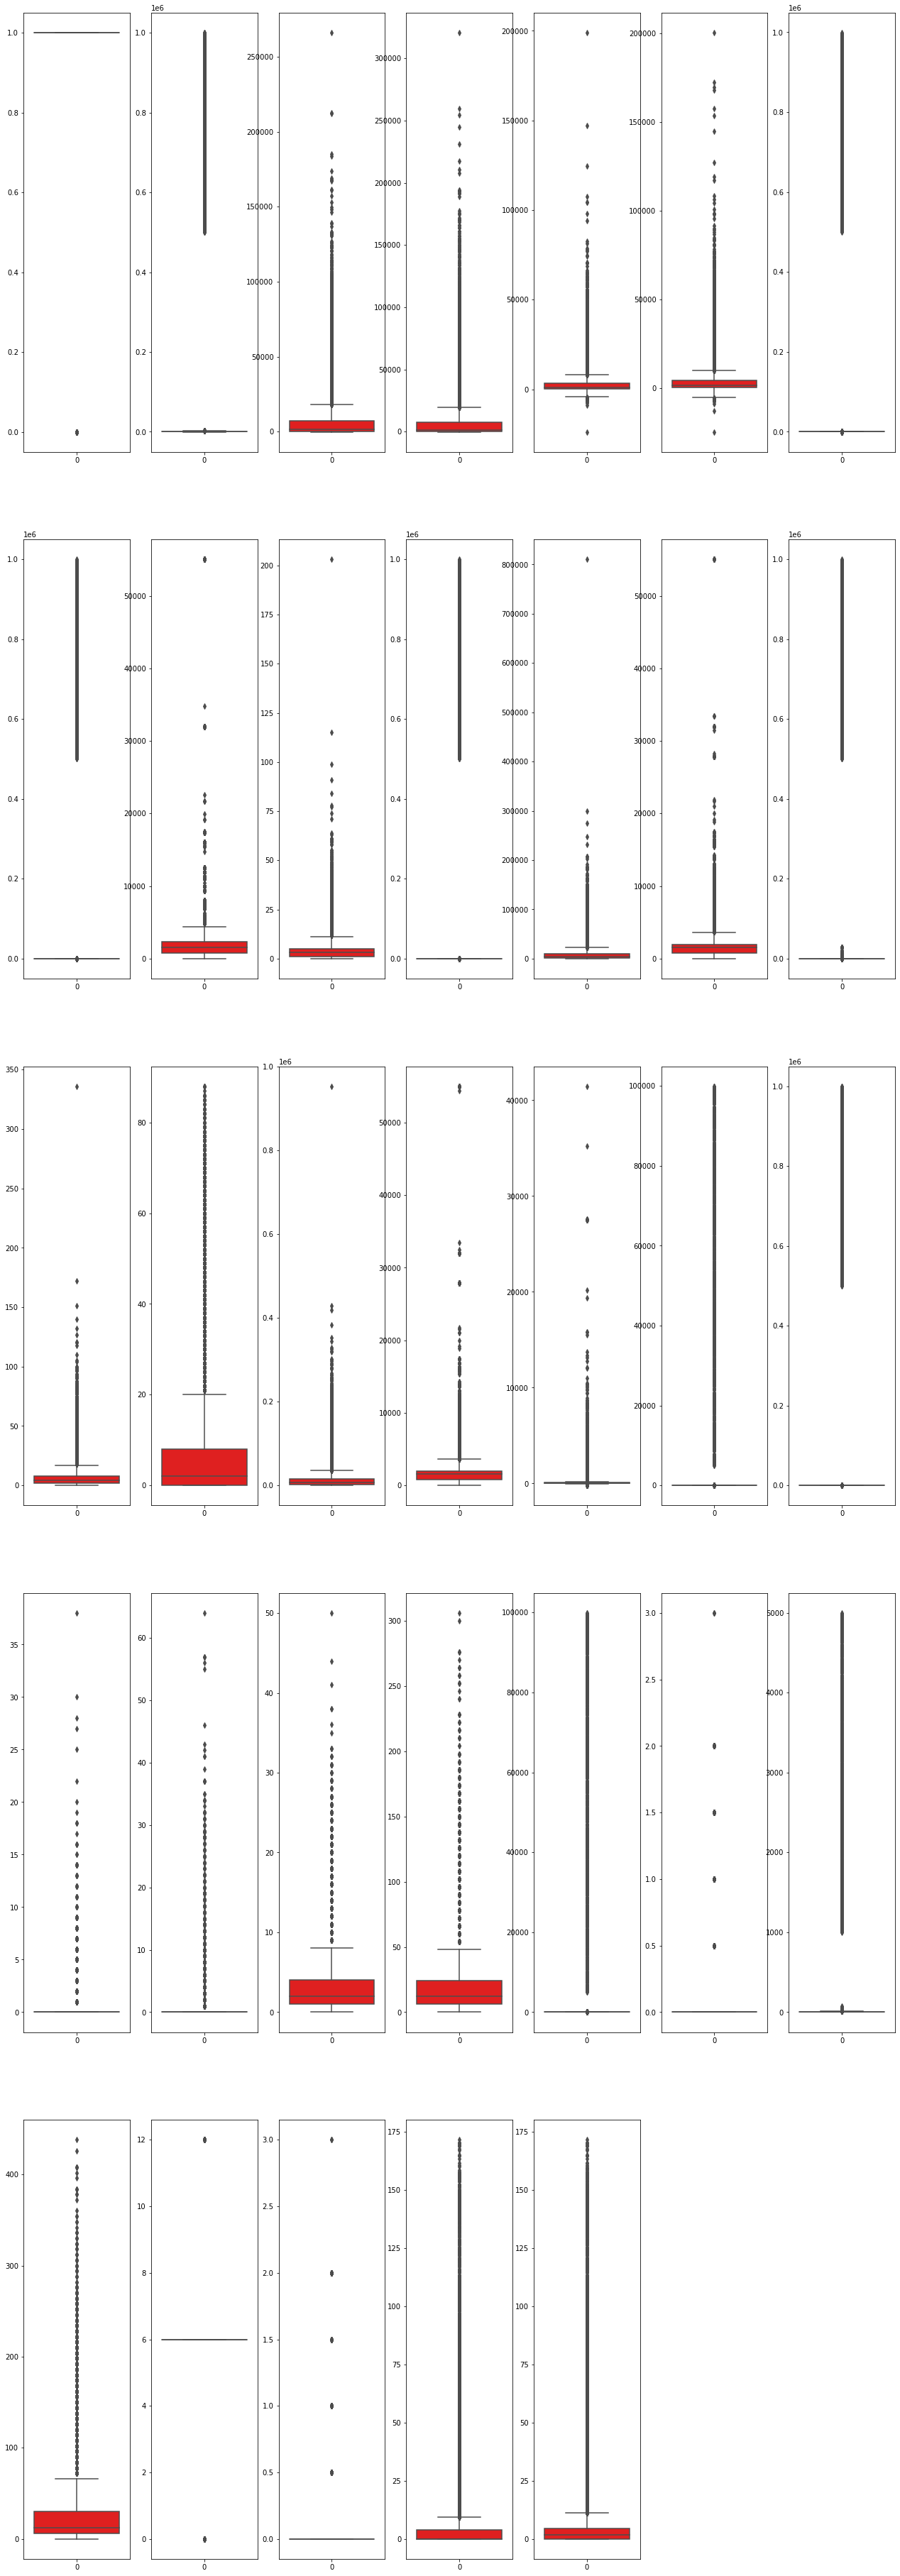

In [48]:
numcolnew= ['label', 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
ncol=22
nrows=8
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(numcolnew)):
    plt.subplot(5,7,i+1)
    sns.boxplot(data=df[numcolnew[i]],color='red',orient='v')

There are lot many outliers and we might not remove all otherwise we will lose much data.

# Bivariate Analysis

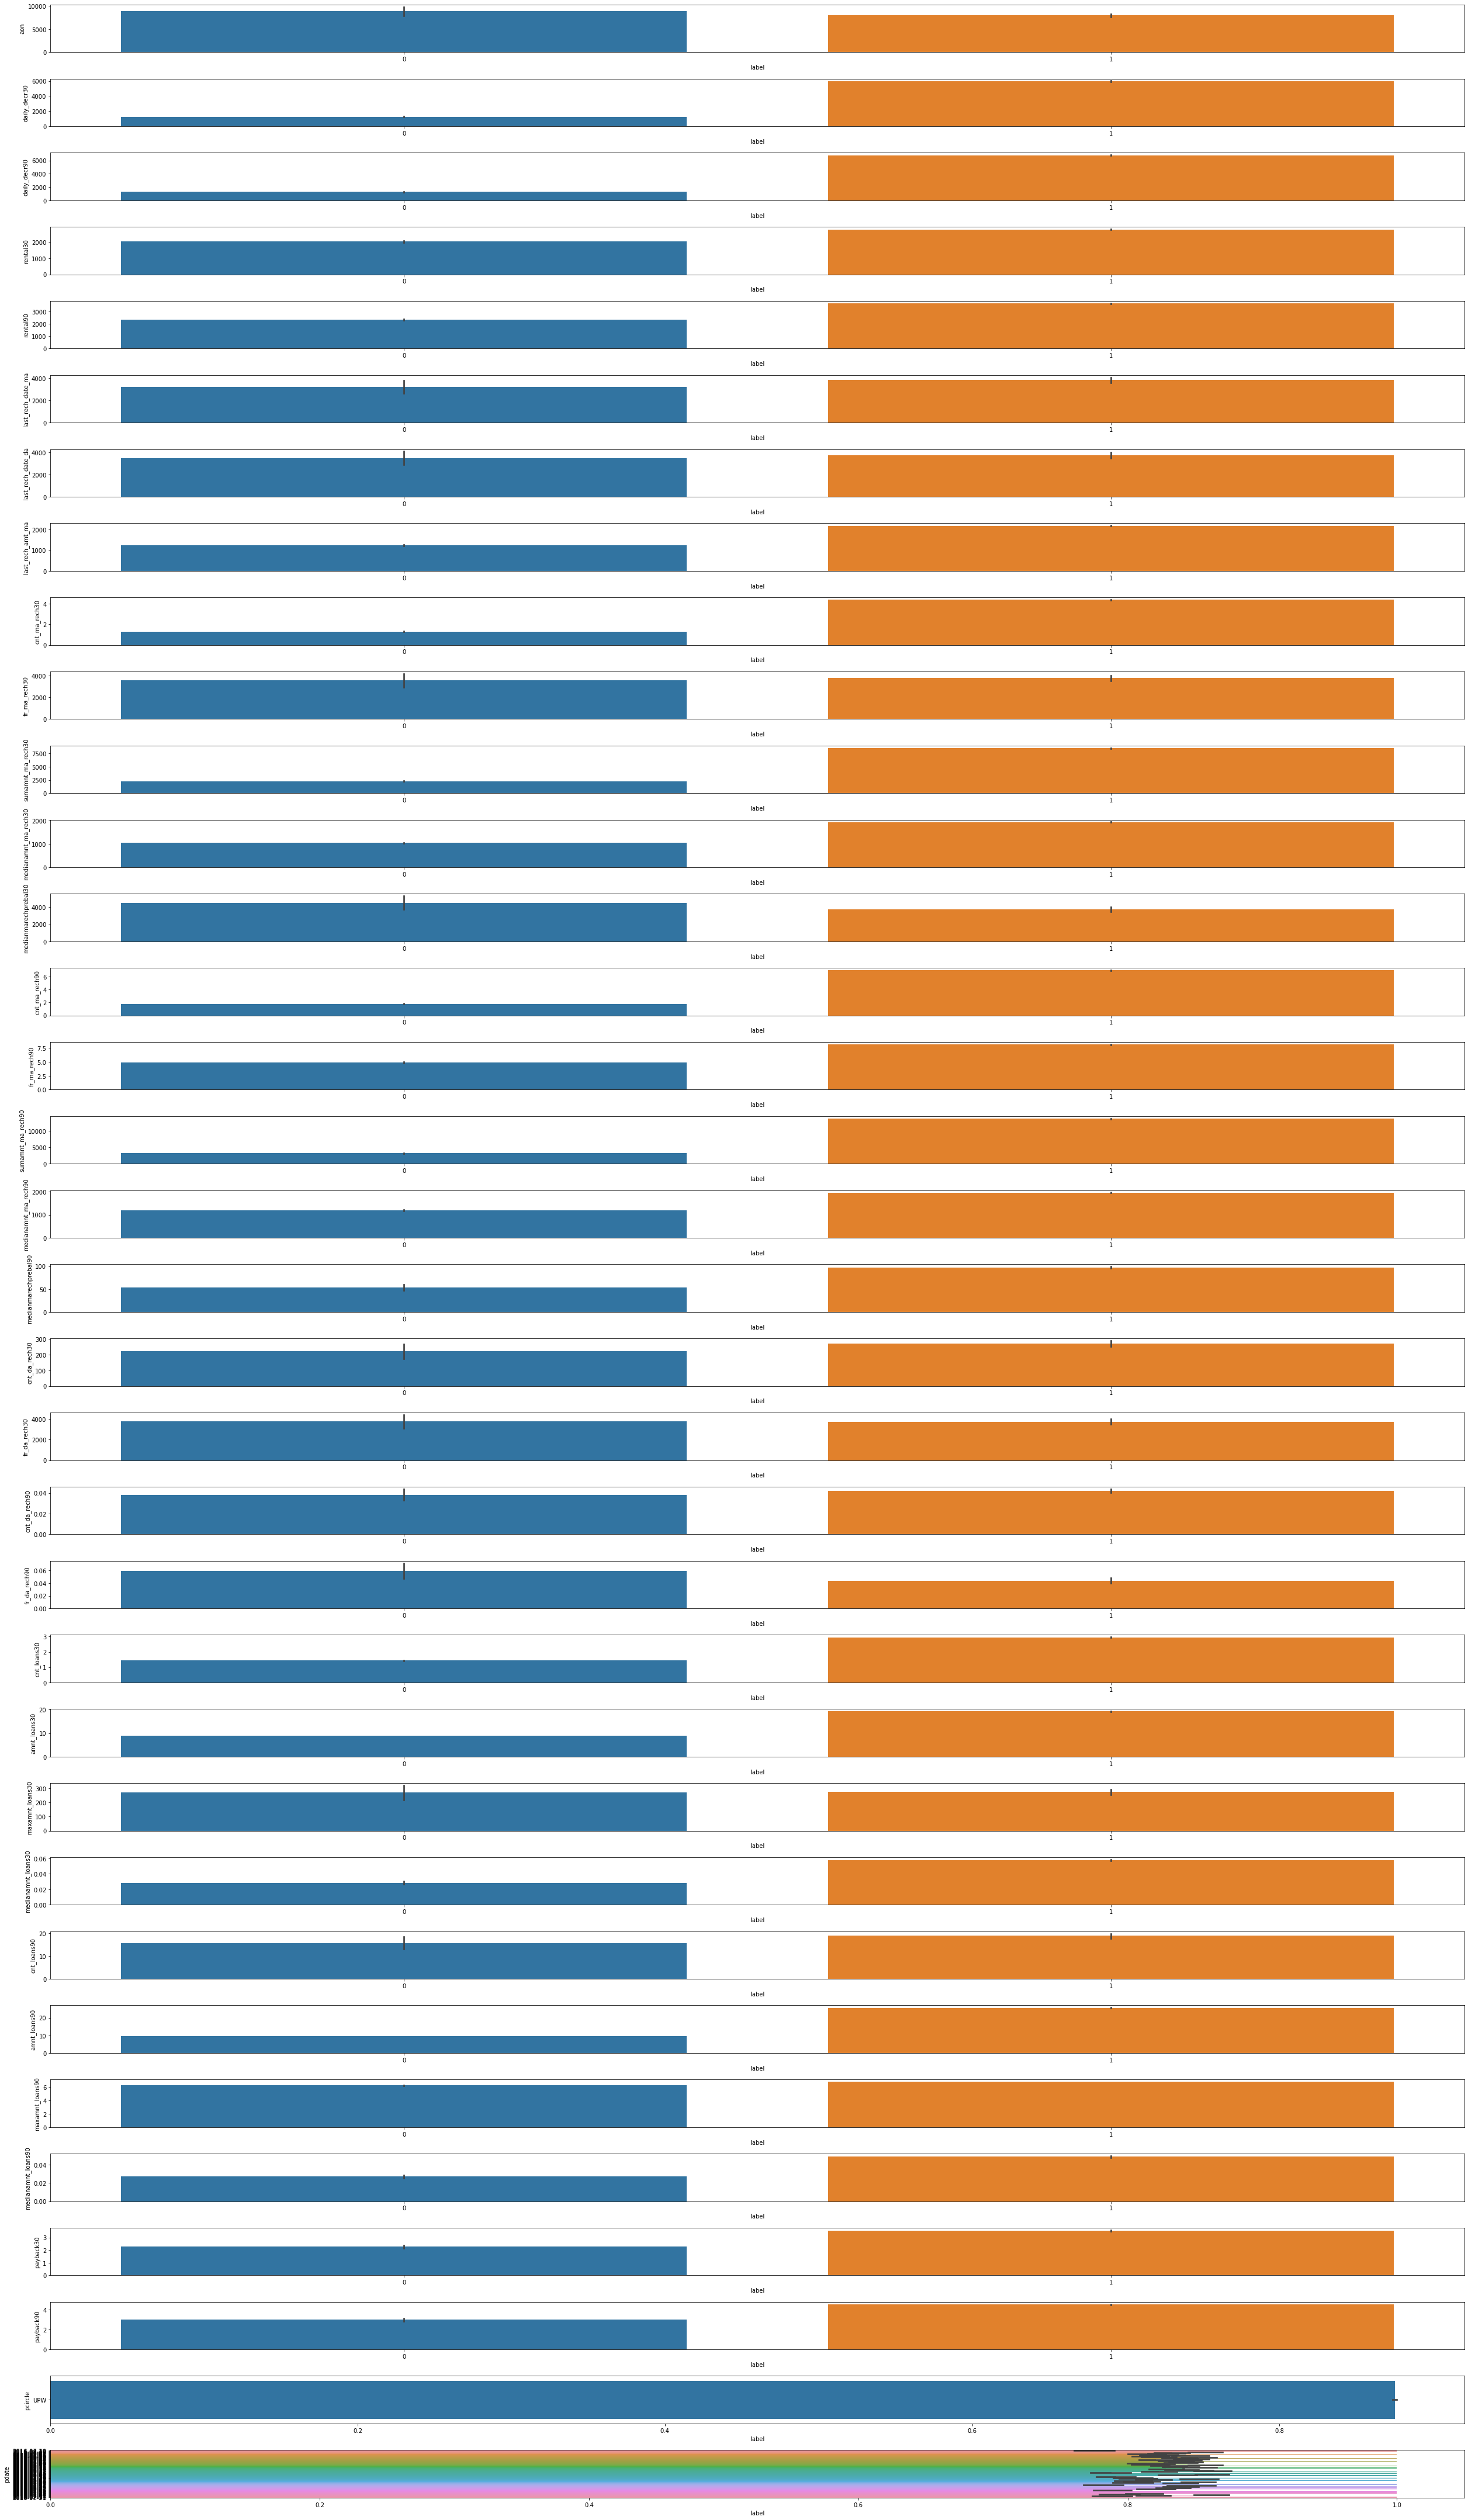

In [49]:
fig, axs = plt.subplots(34, figsize = (35,60))
plt1 = sns.barplot(y=df['aon'], x=df['label'], ax = axs[0])
plt2 = sns.barplot(y=df['daily_decr30'], x=df['label'], ax=axs[1])
plt3 = sns.barplot(y=df['daily_decr90'], x=df['label'], ax=axs[2])
plt4 = sns.barplot(y=df['rental30'], x=df['label'], ax=axs[3])
plt5 = sns.barplot(y=df['rental90'], x=df['label'], ax=axs[4])
plt6 = sns.barplot(y=df['last_rech_date_ma'], x=df['label'], ax=axs[5])
plt7 = sns.barplot(y=df['last_rech_date_da'], x=df['label'], ax=axs[6])
plt8 = sns.barplot(y=df['last_rech_amt_ma'], x=df['label'], ax=axs[7])
plt9 = sns.barplot(y=df['cnt_ma_rech30'], x=df['label'], ax=axs[8])
plt10 = sns.barplot(y=df['fr_ma_rech30'], x=df['label'],ax=axs[9])
plt11 = sns.barplot(y=df['sumamnt_ma_rech30'], x=df['label'], ax=axs[10])
plt12 = sns.barplot(y=df['medianamnt_ma_rech30'], x=df['label'], ax=axs[11])
plt13 = sns.barplot(y=df['medianmarechprebal30'], x=df['label'], ax=axs[12])
plt14 = sns.barplot(y=df['cnt_ma_rech90'], x=df['label'], ax=axs[13])
plt15 = sns.barplot(y=df['fr_ma_rech90'], x=df['label'],ax=axs[14])
plt16 = sns.barplot(y=df['sumamnt_ma_rech90'], x=df['label'], ax=axs[15])
plt17 = sns.barplot(y=df['medianamnt_ma_rech90'], x=df['label'], ax=axs[16])
plt18 = sns.barplot(y=df['medianmarechprebal90'], x=df['label'], ax=axs[17])
plt19 = sns.barplot(y=df['cnt_da_rech30'], x=df['label'], ax = axs[18])
plt20 = sns.barplot(y=df['fr_da_rech30'], x=df['label'], ax=axs[19])
plt21 = sns.barplot(y=df['cnt_da_rech90'], x=df['label'], ax=axs[20])
plt22 = sns.barplot(y=df['fr_da_rech90'], x=df['label'], ax=axs[21])
plt23 = sns.barplot(y=df['cnt_loans30'], x=df['label'], ax=axs[22])
plt24 = sns.barplot(y=df['amnt_loans30'], x=df['label'], ax=axs[23])
plt25 = sns.barplot(y=df['maxamnt_loans30'], x=df['label'], ax=axs[24])
plt26 = sns.barplot(y=df['medianamnt_loans30'], x=df['label'], ax=axs[25])
plt27 = sns.barplot(y=df['cnt_loans90'], x=df['label'], ax=axs[26])
plt28 = sns.barplot(y=df['amnt_loans90'], x=df['label'],ax=axs[27])
plt29 = sns.barplot(y=df['maxamnt_loans90'], x=df['label'], ax=axs[28])
plt30 = sns.barplot(y=df['medianamnt_loans90'], x=df['label'], ax=axs[29])
plt31 = sns.barplot(y=df['payback30'], x=df['label'], ax=axs[30])
plt32 = sns.barplot(y=df['payback90'], x=df['label'], ax=axs[31])
plt33 = sns.barplot(y=df['pcircle'], x=df['label'],ax=axs[32])
plt34 = sns.barplot(y=df['pdate'], x=df['label'], ax=axs[33])
plt.tight_layout()

Every column is either directly or inversely related to the target variable 'label' except 'pdate' .

Also 'pcircle' has only one value Hence we will drop it
Unnamed: 0 is a column for serial number , hence we will drop it as well
'msisdn' has phone number hence we will drop it as well
'daily_decr30' has same value as 'daily_decr90' so we will delete 'daily_decr30'

We have converted the object datatype into ordinal by label encoding.

In [50]:
df.drop(['Unnamed: 0','msisdn','pdate','pcircle','daily_decr30'],axis=1,inplace=True)

We have dropped index number, phone number, date, pcircle and 'daily_decr30'

# Multivariate Analysis

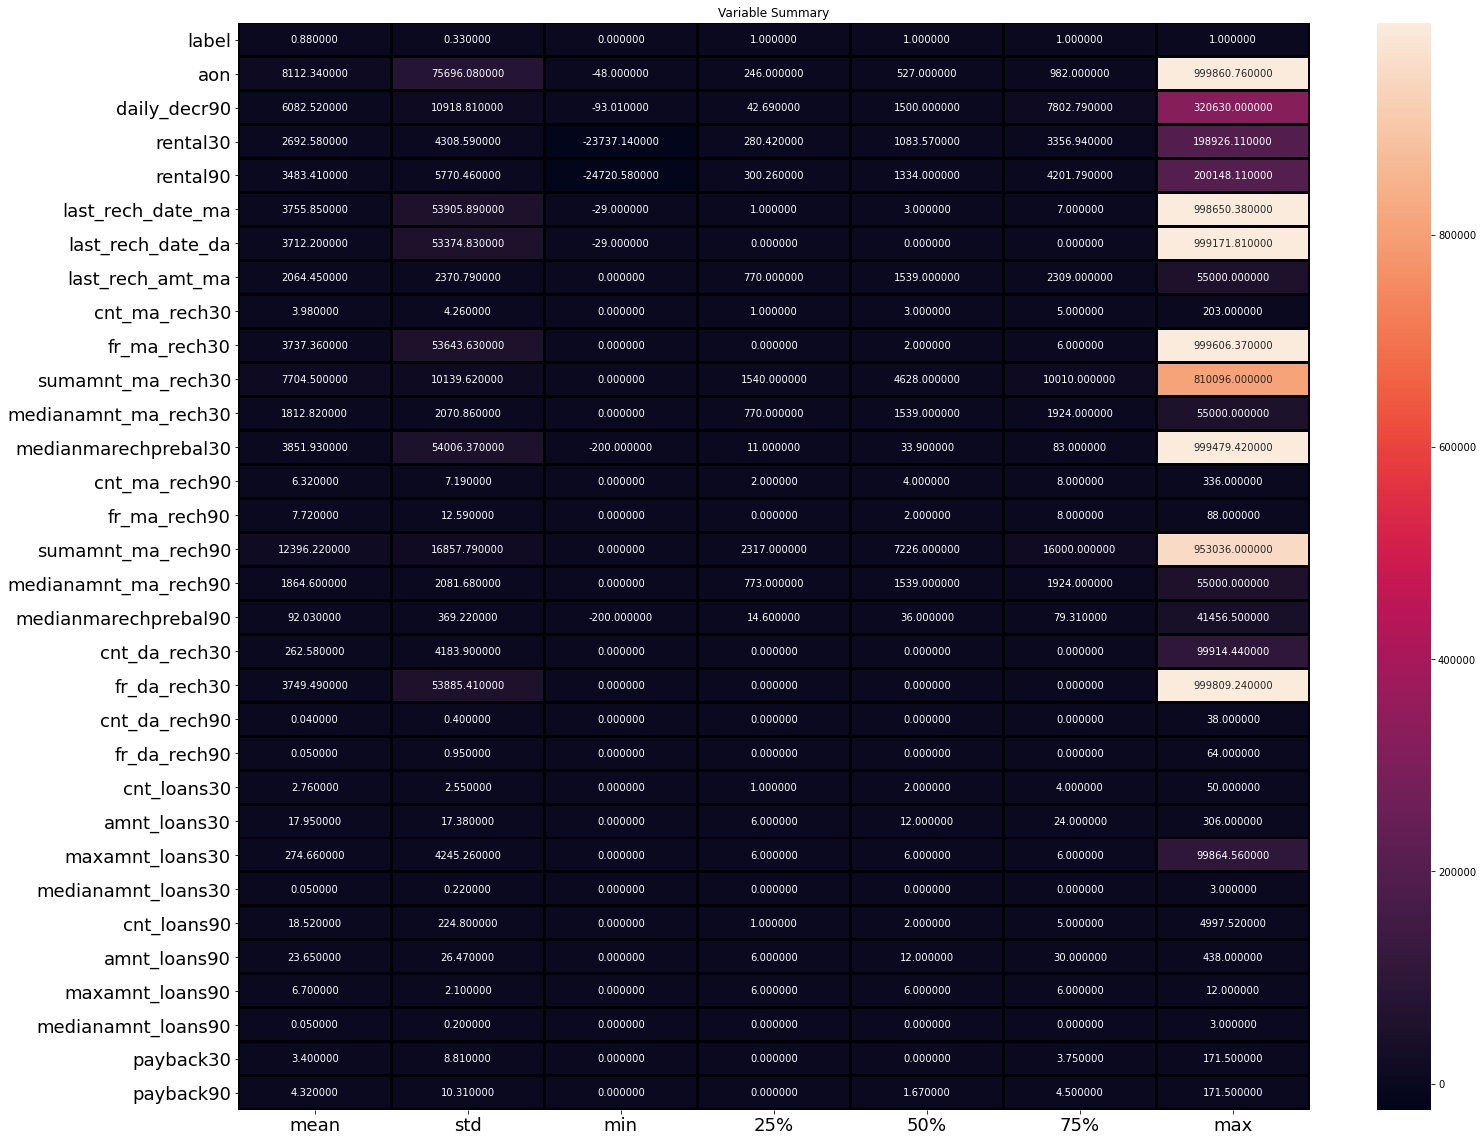

In [51]:
plt.figure(figsize=(24,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

From the above plot we are determining mean, standard deviation, median, minimum and maximum of each column.

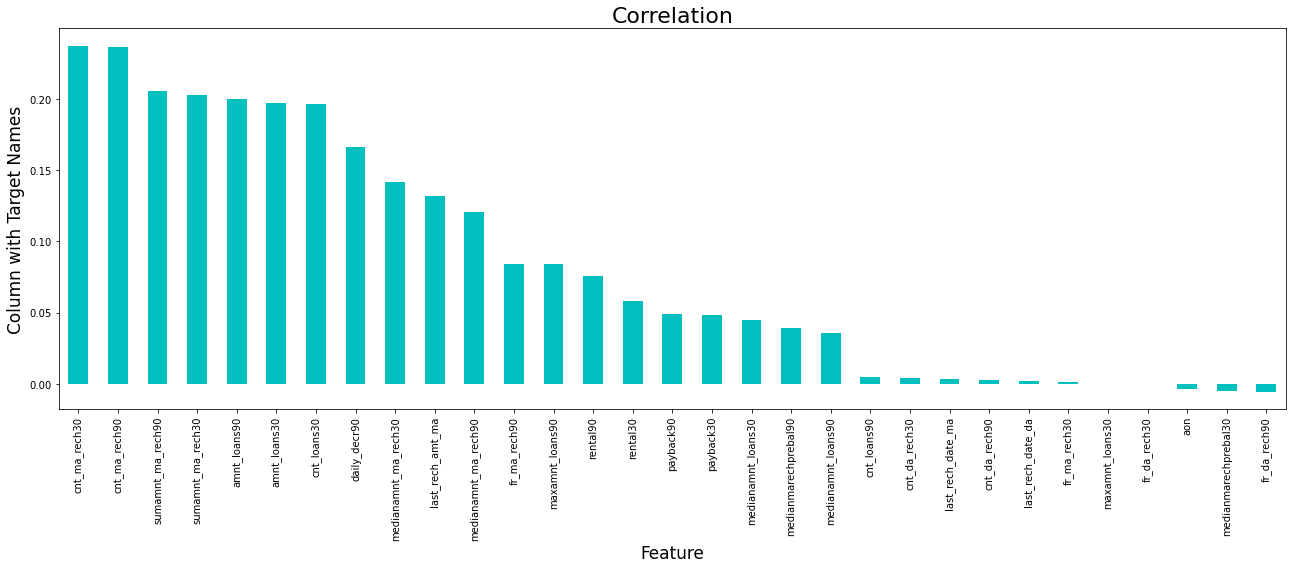

In [52]:
dfc = df.corr()
plt.figure(figsize=(22,7))
dfc['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.ylabel('Column with Target Names',fontsize=17)
plt.xlabel('Feature',fontsize=17)
plt.title('Correlation',fontsize=22)
plt.show()

All the features except 'aon', 'medianmarechprebal30' and 'fr_da_rech90' are positively correlated to the target variable. 'maxamnt_loans30' and 'fr_da_rech30' have negligible relation to the target variable.

<AxesSubplot:>

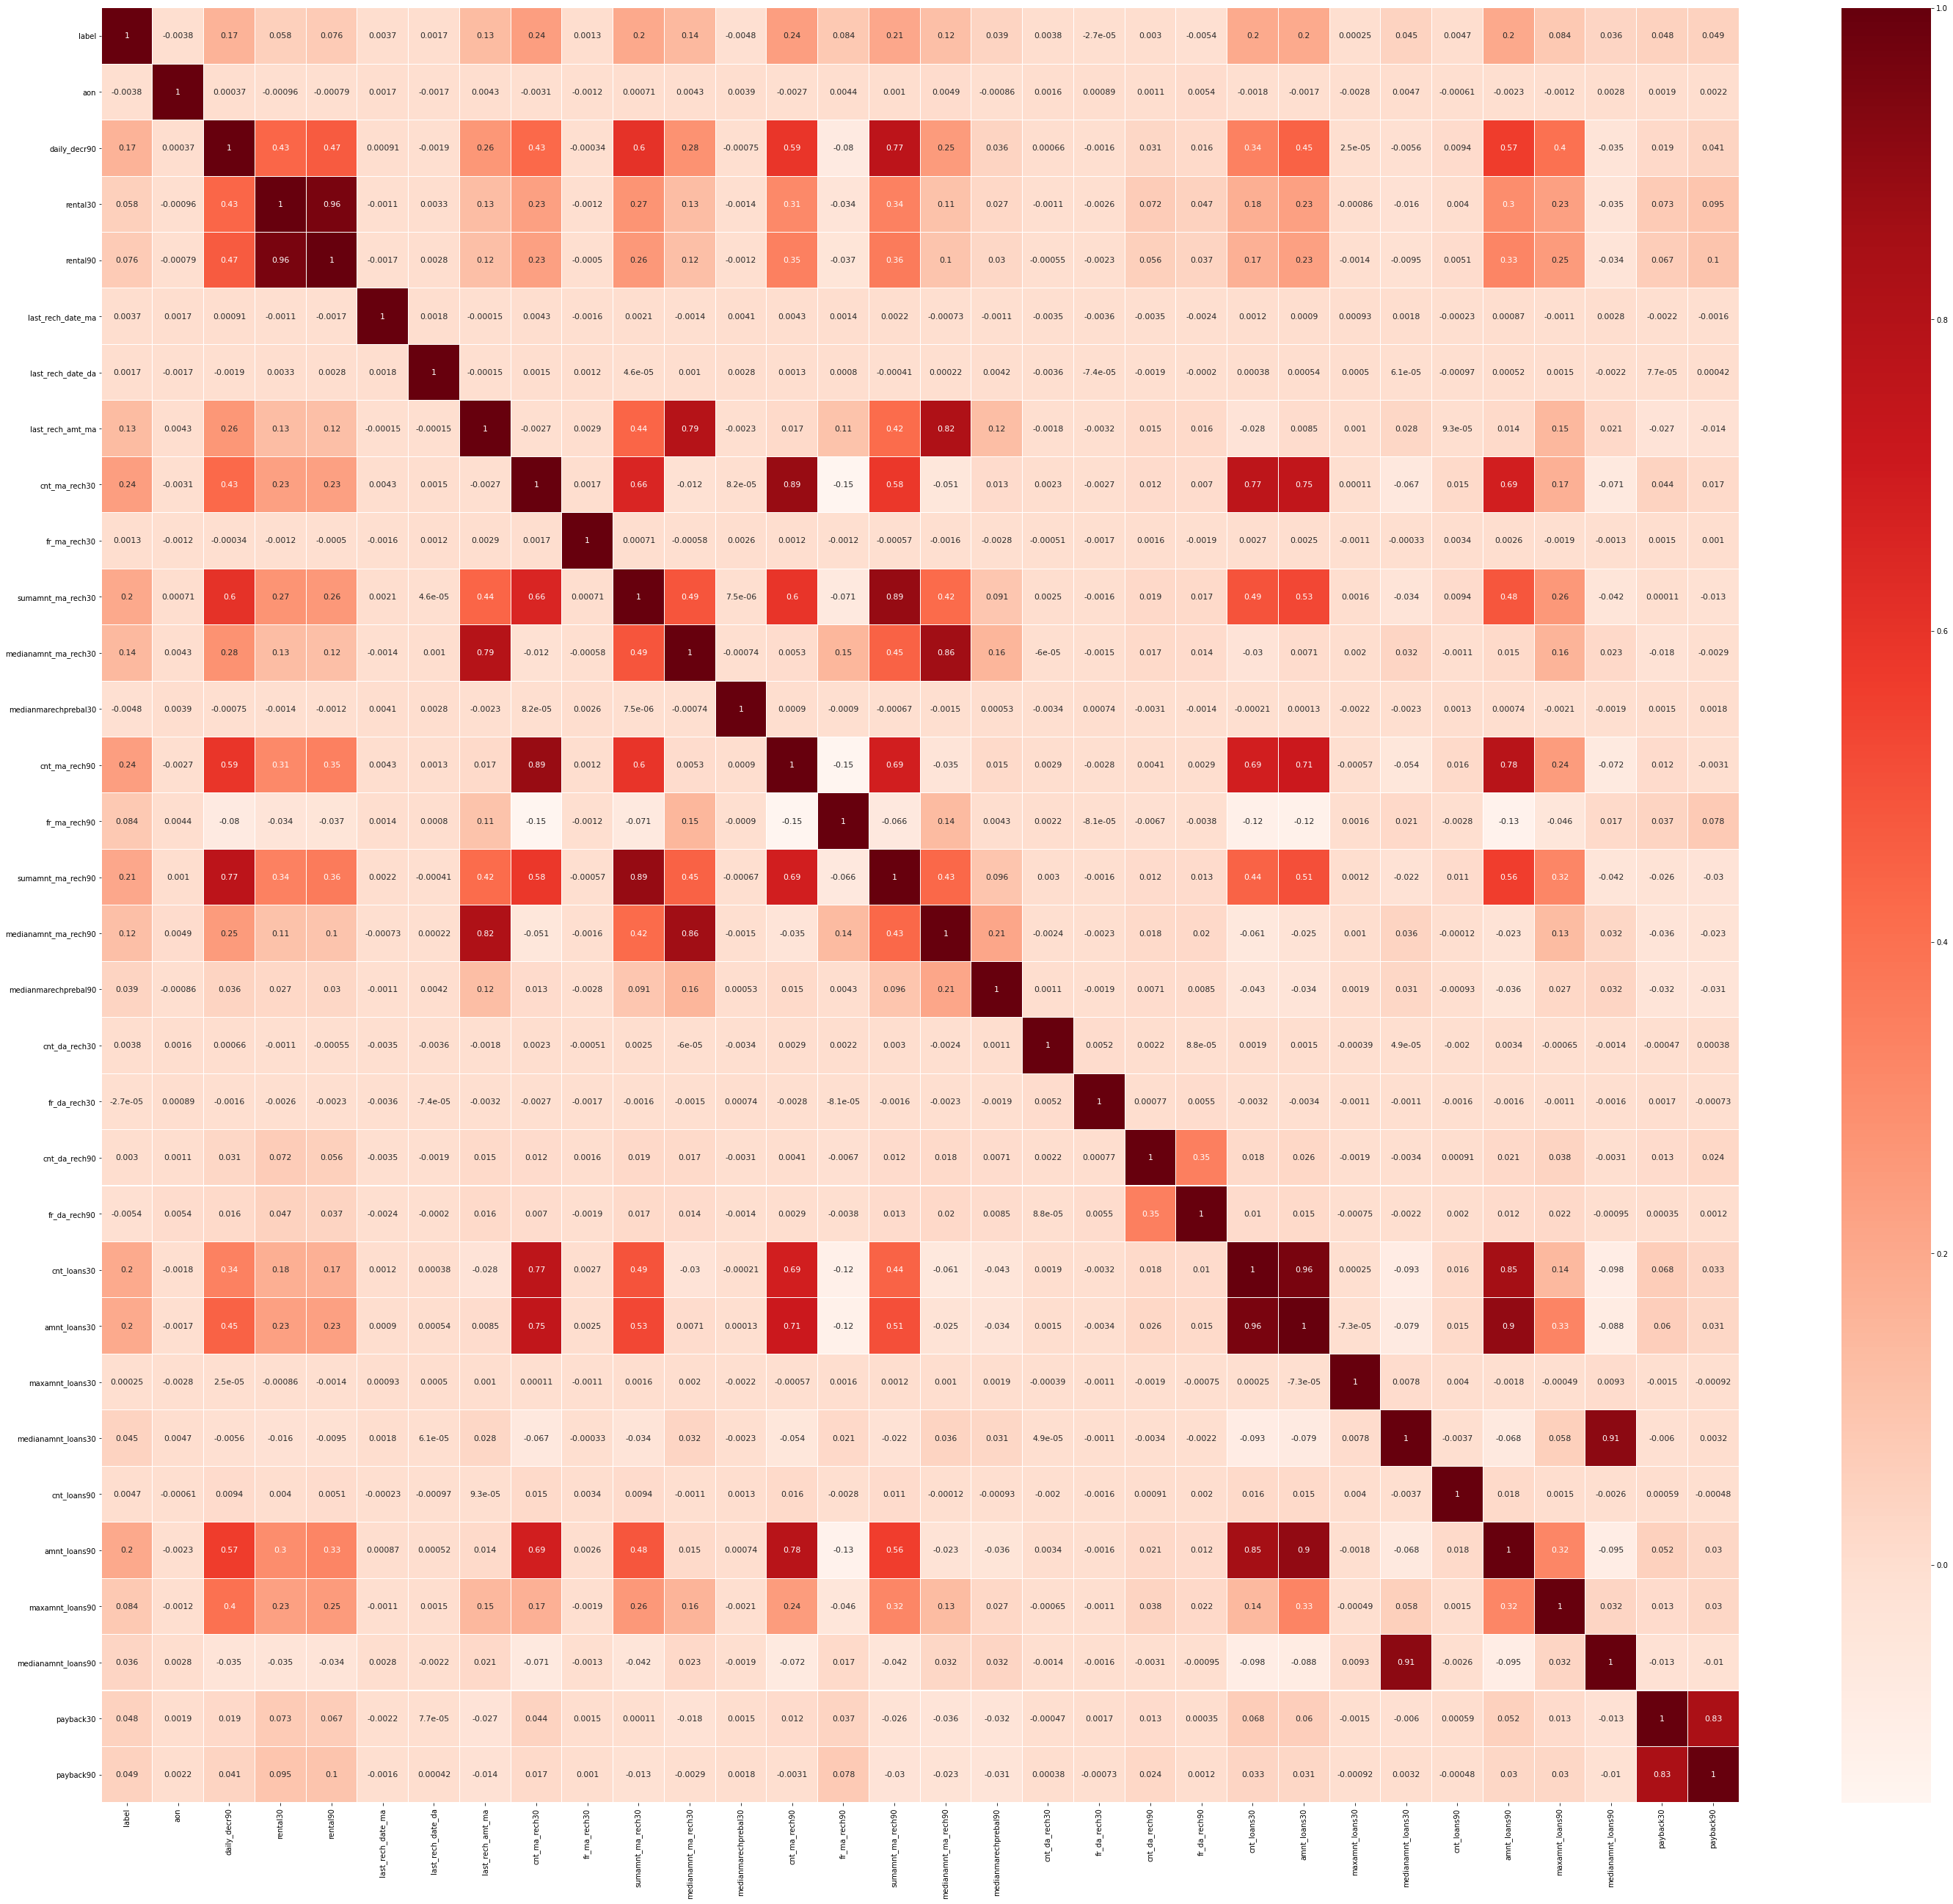

In [53]:
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":11})

There exist a lot of multicollinearity between 'fr_da_rech30' and 'fr_da_rech90'; 'maxamnt_loans30' and 'maxamnt_loans90' ; 'rental30' and 'rental90'; 'cnt_ma_rech30' and 'cnt_ma_rech90' ; 'sumamnt_ma_rech30' and 'sumamnt_ma_rech90' ; 'cnt_loans30' and 'cnt_loans90' ; 'amnt_loans30' and 'amnt_loans90' ; 'medianamnt_loans30' and 'medianamnt_loans90' . Hence we will drop either column from each group which is least correlated with the target column. 

<AxesSubplot:>

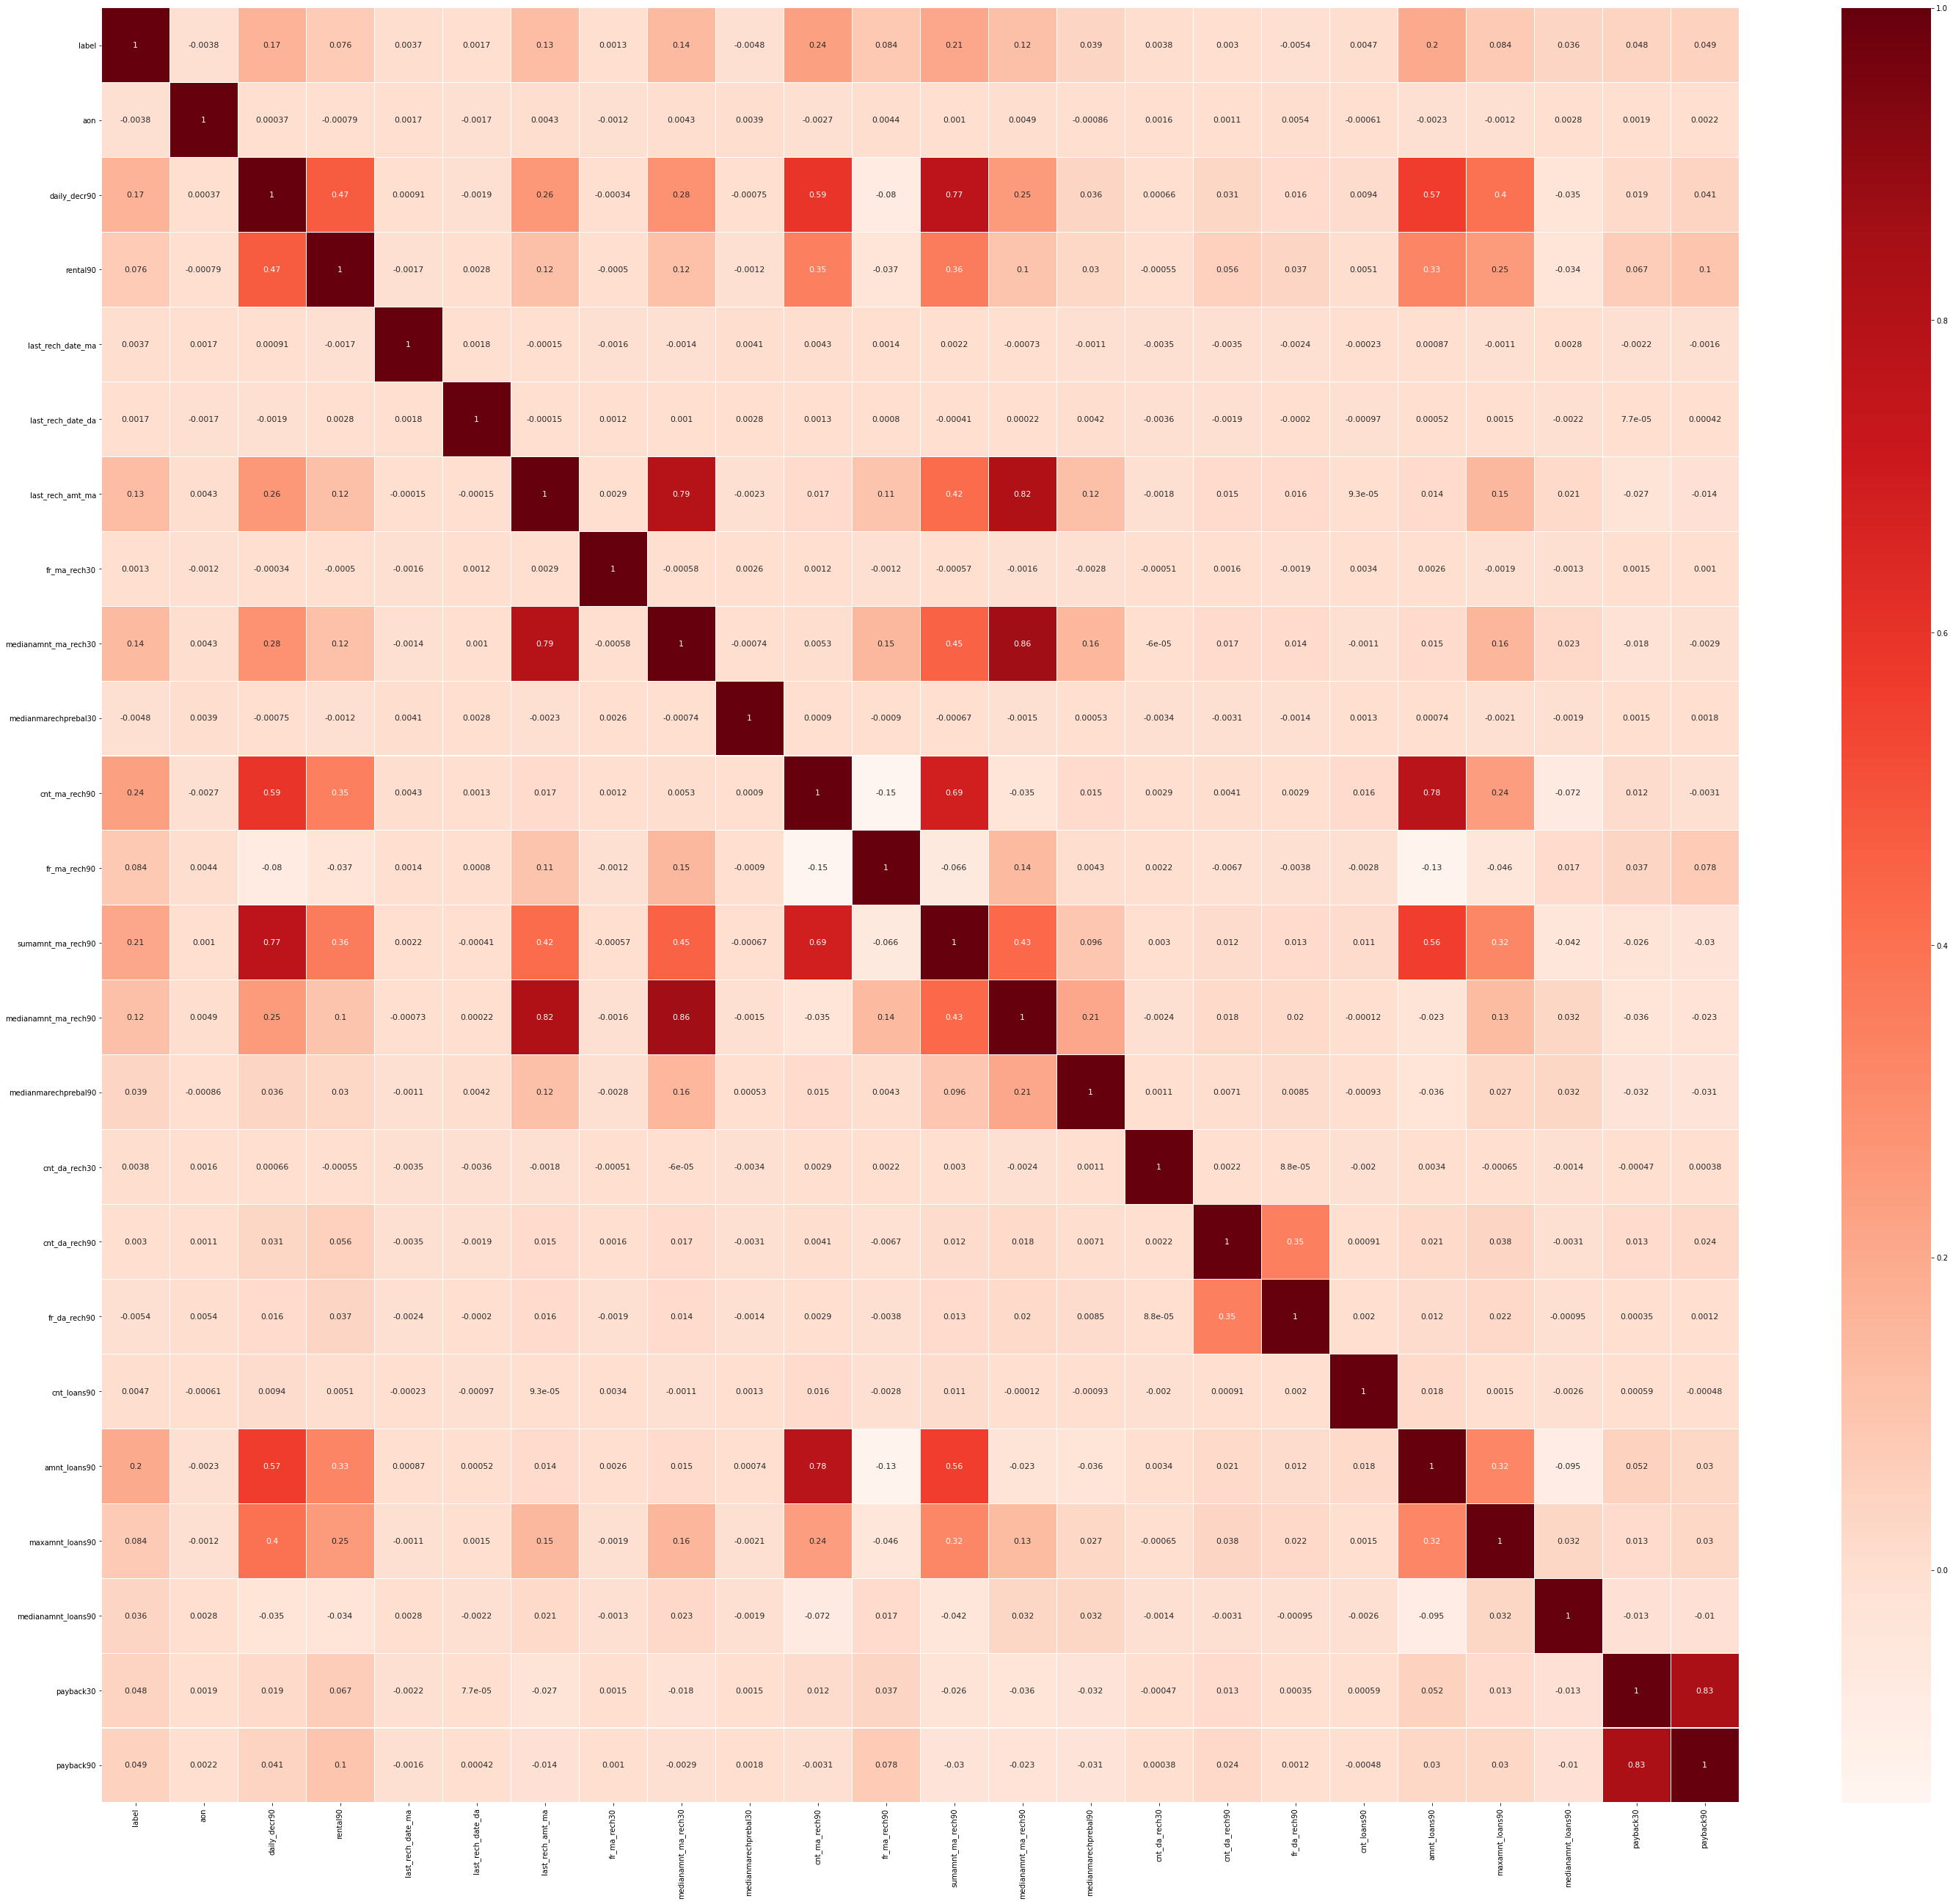

In [54]:
df.drop(['fr_da_rech30','maxamnt_loans30','rental30','cnt_ma_rech30','sumamnt_ma_rech30','cnt_loans30','amnt_loans30','medianamnt_loans30'],axis=1,inplace=True)
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":11})

Now the multicollinearity has been reduced to the acceptable range.

# Data Preprocessing

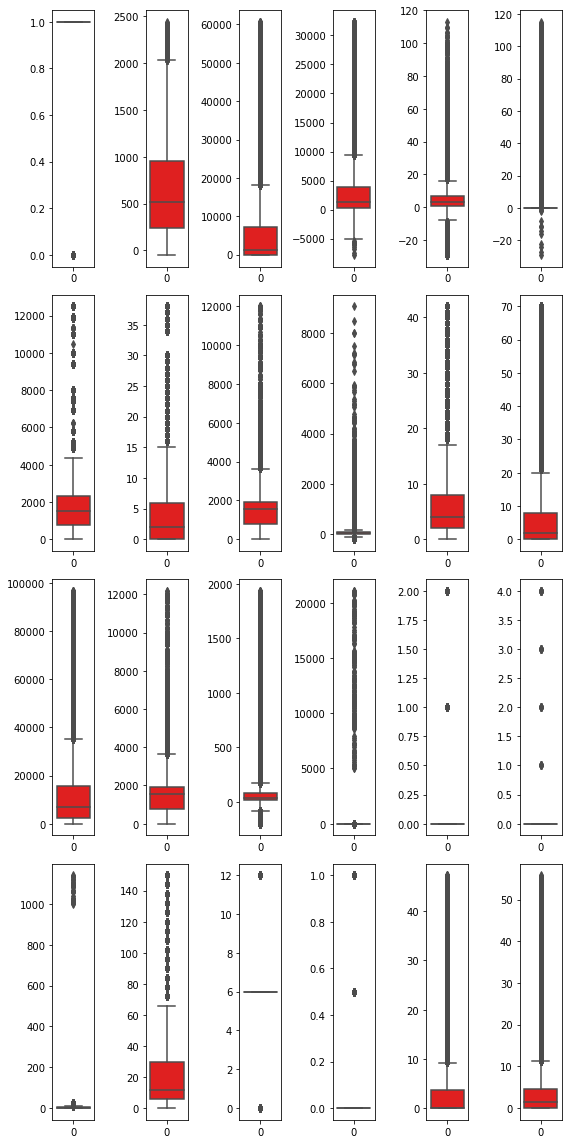

In [55]:
collist=df.columns.values
ncol=6
nrows=4
plt.figure(figsize=(2*nrows,4*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='red')
    plt.tight_layout()

Since there are a lot many outliers, let's check for the once with zscore greater than 5

In [56]:
dfzscore=np.abs(zscore(df))
dfnew=df[(dfzscore<5).all(axis=1)]
df=dfnew
df

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,...,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,1539.0,7.50,...,7.50,0.0,0,0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,5787.0,61.04,...,61.04,0.0,0,0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,1539.0,66.32,...,66.32,0.0,0,0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.0,0.00,...,2.50,0.0,0,0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,2309.0,29.00,...,35.00,0.0,0,0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,2.0,3178.0,91.81,...,91.81,0.0,0,0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,1.0,773.0,161.30,...,111.80,0.0,0,0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11904.350000,8893.20,3.0,0.0,1539,8.0,1539.0,51.13,...,47.13,0.0,0,0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,4.0,773.0,164.00,...,100.00,0.0,1,0,3.0,24,12,0.0,0.000000,10.500000


After removing the outliers, we now have 193675 rows.

In [57]:
print('Data Loss =', ((209593-193675)/209593)*100 , '%')

Data Loss = 7.594719289289241 %


This data loss is in acceptable range. 

In [58]:
df.skew()

label                   -2.250669
aon                      0.949928
daily_decr90             2.460761
rental90                 2.639322
last_rech_date_ma        3.100937
last_rech_date_da       10.004146
last_rech_amt_ma         2.212374
fr_ma_rech30             2.011830
medianamnt_ma_rech30     2.435568
medianmarechprebal30    10.950338
cnt_ma_rech90            1.843752
fr_ma_rech90             2.184523
sumamnt_ma_rech90        2.216341
medianamnt_ma_rech90     2.452949
medianmarechprebal90     4.843069
cnt_da_rech30           37.569139
cnt_da_rech90            7.448449
fr_da_rech90            73.793370
cnt_loans90             70.792807
amnt_loans90             2.167833
maxamnt_loans90          1.753878
medianamnt_loans90       4.440553
payback30                3.670435
payback90                3.406029
dtype: float64

There's a lot of skewness in 'cnt_da_rech30', 'fr_da_rech90' and 'cnt_loans90'. We will treat this using power transformation technique.

In [59]:
x=df.drop(['label'],axis=1)
y=df['label']
from sklearn.preprocessing import power_transform
a=power_transform(x,method='yeo-johnson')

We have separated the features and target into x and y . Also we have treated the skewness using power transformation technique.

In [60]:
scale = StandardScaler()
x=scale.fit_transform(x)

Scaling the features for better results.

<AxesSubplot:xlabel='label', ylabel='count'>

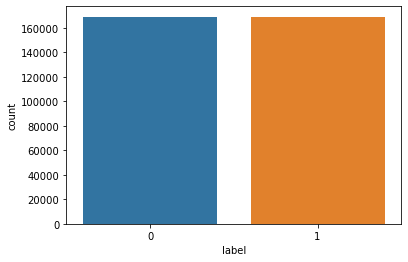

In [61]:
smt=SMOTE()
x,y = smt.fit_resample(x,y)
sns.countplot(y)

Treating Class Imbalance of Target variable using Over_Sampling technique.

# Model Building

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy Score of GaussianNB is',accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

Accuracy Score of GaussianNB is 0.7004579701580735
[[29598  4116]
 [16160 17816]]
              precision    recall  f1-score   support

           0       0.65      0.88      0.74     33714
           1       0.81      0.52      0.64     33976

    accuracy                           0.70     67690
   macro avg       0.73      0.70      0.69     67690
weighted avg       0.73      0.70      0.69     67690



We've applied GaussianNB algorithm and printed it's accuracy score, confusion matrix  and classification report.

In [63]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)
print('Accuracy Score of Logistic Regression is', accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy Score of Logistic Regression is 0.7674988920076821
[[27188  6526]
 [ 9212 24764]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     33714
           1       0.79      0.73      0.76     33976

    accuracy                           0.77     67690
   macro avg       0.77      0.77      0.77     67690
weighted avg       0.77      0.77      0.77     67690



We've applied LogisticRegression algorithm and printed it's accuracy score, confusion matrix  and classification report.

In [64]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd.score(x_train,y_train)
predsgd=sgd.predict(x_test)
print('Accuracy score of SGDClassifier is',accuracy_score(y_test,predsgd))
print(confusion_matrix(y_test,predsgd))
print(classification_report(y_test,predsgd))

Accuracy score of SGDClassifier is 0.7602009159403161
[[26229  7485]
 [ 8747 25229]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     33714
           1       0.77      0.74      0.76     33976

    accuracy                           0.76     67690
   macro avg       0.76      0.76      0.76     67690
weighted avg       0.76      0.76      0.76     67690



We've applied SGDClassifier algorithm and printed it's accuracy score, confusion matrix  and classification report.

In [65]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy score of DecisionTree Classifier is',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy score of DecisionTree Classifier is 0.887989363273748
[[30277  3437]
 [ 4145 29831]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     33714
           1       0.90      0.88      0.89     33976

    accuracy                           0.89     67690
   macro avg       0.89      0.89      0.89     67690
weighted avg       0.89      0.89      0.89     67690



We've applied DecisionTreeClassifier algorithm and printed it's accuracy score, confusion matrix  and classification report.

In [66]:
gc = GradientBoostingClassifier()
gc.fit(x_train,y_train)
gc.score(x_train,y_train)
predgc=gc.predict(x_test)
print('Accuracy Score of GradientBoostingClassifier is',accuracy_score(y_test,predgc))
print(confusion_matrix(y_test,predgc))
print(classification_report(y_test,predgc))

Accuracy Score of GradientBoostingClassifier is 0.8761264588565519
[[30203  3511]
 [ 4874 29102]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     33714
           1       0.89      0.86      0.87     33976

    accuracy                           0.88     67690
   macro avg       0.88      0.88      0.88     67690
weighted avg       0.88      0.88      0.88     67690



We've applied GradientBoostingClassifier algorithm and printed it's accuracy score, confusion matrix  and classification report.

In [67]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForest Classifier is',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForest Classifier is 0.9409661693012262
[[31705  2009]
 [ 1987 31989]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     33714
           1       0.94      0.94      0.94     33976

    accuracy                           0.94     67690
   macro avg       0.94      0.94      0.94     67690
weighted avg       0.94      0.94      0.94     67690



We've applied RandomForestClassifier algorithm and printed it's accuracy score, confusion matrix  and classification report.

In [68]:
print('Accuracy of GaussianNB is',(accuracy_score(y_test,predgnb))*100,'%')
print('Accuracy of Logistic Regression is',(accuracy_score(y_test,predlr))*100,'%')
print('Accuracy of SGDClassifier is',(accuracy_score(y_test,predsgd))*100,'%')
print('Accuracy of DecisionTree Classifier is',(accuracy_score(y_test,preddt))*100,'%')
print('Accuracy of GradientBoostingClassifier is',(accuracy_score(y_test,predgc))*100,'%')
print('Accuracy of RandomForest Classifier is',(accuracy_score(y_test,predrf))*100,'%')

Accuracy of GaussianNB is 70.04579701580735 %
Accuracy of Logistic Regression is 76.74988920076821 %
Accuracy of SGDClassifier is 76.02009159403161 %
Accuracy of DecisionTree Classifier is 88.7989363273748 %
Accuracy of GradientBoostingClassifier is 87.6126458856552 %
Accuracy of RandomForest Classifier is 94.09661693012262 %


Printing the accuracy of all the algorithms we have used. 'RandomForestClassifier' has the highest accuracy of all the other algorithms for the given dataset.

# Cross Validation Score

In [69]:
print("CVS for GaussianNB =",cvs(gnb,x,y,cv=5).mean()*100,"%")
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for SGDClassifier =",cvs(sgd,x,y,cv=5).mean()*100,"%")
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for GradientBoostingClassifier =",cvs(gc,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")

CVS for GaussianNB = 70.17858073318173 %
CVS for Logistic Regression = 76.83868711541632 %
CVS for SGDClassifier = 76.48796909032137 %
CVS for DecisionTree Classifier = 88.43131979864083 %
CVS for GradientBoostingClassifier = 87.34873209071493 %
CVS for Random Forest Classifier = 94.08237204014335 %


From the Accuracy score and Cross validation score , we choose 'RandomForestClassifier' for hyper parameter tuning as it has the high accuracy and least difference between accuracy score and cross validation score.

# Hyper Parameter Tuning

In [70]:
parameter={'n_estimators':np.arange(50,300,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

{'class_weight': 'balanced'
 'criterion': 'entropy' 
 'max_features': 'sqrt' 
 'n_estimators': 200 }


We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

In [71]:
Micro = RandomForestClassifier(criterion='entropy', n_estimators=200, max_features='sqrt', class_weight='balanced')
Micro.fit(x_train,y_train)
pred=Micro.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier of Final MicroCredit Label Prediction Model is ", acc*100, "%.")

Accuracy of Random Forest Classifier of Final MicroCredit Label Prediction Model is  94.25321317772197 %.


The accuracy we got for final model is very good.

In [72]:
print(confusion_matrix(y_test,pred))
print("\n",classification_report(y_test,pred))

[[31681  2033]
 [ 1871 32105]]

               precision    recall  f1-score   support

           0       0.94      0.94      0.94     33714
           1       0.94      0.94      0.94     33976

    accuracy                           0.94     67690
   macro avg       0.94      0.94      0.94     67690
weighted avg       0.94      0.94      0.94     67690



The F1 score, precision, recall and confusion matrix interprets that the overall model performance is high.

# AUC-ROC CURVE

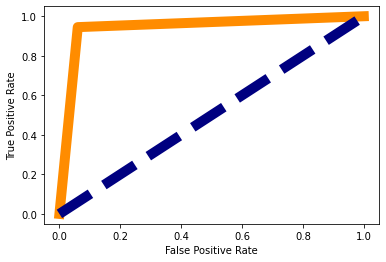

In [73]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Since the model without outliers and Class Imbalance is working welll. Hence we will choose that only.

# Conclusion

In [74]:
a= np.array(y_test)
predicted = np.array(Micro.predict(x_test))
MCS_Prediction=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
MCS_Prediction

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
67685,0,0
67686,1,1
67687,1,1
67688,0,0


We can see that almost all the predicted values are equal to the Original values and hence we conclude that our model is working very well.

# Model Saving

In [75]:
import pickle
filename = 'MicroCredit.pkl'
pickle.dump(Micro,open(filename,'wb'))

We have saved our final model .